## Project Challenge: Exploratory and predictive analytics upon the comprehensive IMDb data of movies released between 1980-2020

### **_by Hanlu He (s183909), Mia Hang Knudsen (s183998), Jiafei Xia (s213084), Atefeh Hemmati Golsefidi (s216676)_**
---
## _Report_
---
## Table of Contents
- [Part 1: <u>Introduction</u>](#intro)
- [Part 2: <u>Data analysis and visualisation</u>](#datavis)
    - [2.1: <u>Load and present basic information of the dataset</u>](#load)
    - [2.2: <u>Dicussion of profiler output</u>](#profiler) 
- [Part 3: <u>Prediction challenge</u>](#prediction)
    - [3.1: <u>The expected revenue (gross)</u>](#gross)
    - [3.2: <u>IMDb score (score)</u>](#score) 
- [Part 4: <u>Exploratory component</u>](#explore)
    - [4.1: <u>How did major economic crisis affect the production and financial revenue of US movies during 1980 to 2020 ?</u>](#q1)
    - [4.2: <u>Q2</u>](#q2)
- [Part 5: <u>Conclusion</u>](#conc)

In [5]:
#data analysis libraries 
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

from pandas_profiling import ProfileReport

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (18, 8)
sns.set_theme()
from ipywidgets import interact

from bs4 import BeautifulSoup
from IPython.core.display import display, HTML
import requests
# Webscraping 

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import scipy.stats as stats

%matplotlib inline

---
<a id='intro'></a>
## Part 1: _<u>Introduction</u>_

We will be working with dataset obtained through kaggle called [Comprehensive IMDb Data](https://www.kaggle.com/austinwolff/comprehensive-imdb-data). The dataset contains movies released in the USA between 1980-2020 that has available box office data. The dataset was created with the intention of what features/variables contribute most to the movie's box office success. Below is the features list that are included in the dataset.

**Features**

* **titleId**: IMDb's relational database ID for "title".
* **title**: Title of the movie.
* **rating**: MPAA (Motion Picture Association of America film rating system ) rating. 
* **region**: Region. 
* **genre**: The movie genre.
* **released**: Release date of the movie in theaters.
* **year**: Year of movie release.
* **month**: Month of movie release.
* **day**: Day of movie release.
* **score**: IMDb score.
* **director**: Director of the movie.
* **writer**: Writer of the movie.
* **star**: Main actor and actress of the movie.
* **country**: Main country of the movie.
* **budget**: Budget of the movie.
* **gross**: Gross revenue (box office) of the movie.
* **company**: Production company of the movie.
* **runtime**: Runtime of the movie in minutes. 
* **category**: Type of the credit this person ("primaryName") had for working on the movie. 
* **nconst**: IMDb's relational database ID for "primaryName".
* **primaryName**: Name of person who worked on the movie.
* **knownForTitles**: Top 4 titles an actor (indicated by "primaryName") is known for, by titleID. 

---
<a id='datavis'></a>
## Part 2: _<u>Data analysis and visualisation</u>_

---
<a id='prediction'></a>
## Part 3: _<u>Prediction challenge</u>_

<a id='gross'></a>
### 3.1: _<u>The expected revenue (gross)</u>_

<a id='score'></a>
### 3.2: _<u>IMDb score (score)</u>_

In [59]:
df, df_movies = preprocess('Comprehensive IMDb Data.csv')

C:\Users\hanlu\anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice


In [60]:
#df_movies.to_csv('df_movies.csv', index = False)

In [392]:
train = pd.read_csv('df_movies.csv') #Pandas' deep copy does not work so the orgianl will still be changed
low =np.percentile(train['score'], 25)
high = np.percentile(train['score'], 75)
train.loc[train['score'] <= low,'score'] = 1 
train.loc[(train['score'] > low) & (train['score'] < high),'score']  = 2
train.loc[train['score'] >= high, 'score']  = 3
train['score'] = train['score'].astype(int)

In [393]:
# Finding and binarize the features with the top 30 most commen 
train = binary_features(train, ['director','writer','star','country','company', 'duration', 'rating','genre','year'], 30)


In [394]:
from sklearn.utils import shuffle

X = shuffle(train) #,random_state=0


In [395]:
## define features to use 
target = X['score']
movie_title_temp = X['title_year']
features = X[X.columns[~X.columns.isin(['title_year','titleId','title','primaryName','category','region',
'released','released_2','day','score','nconst','knownForTitles','month','continent'])]]

x_train, x_test, y_train, y_test, movie_title_train, movie_title_test = train_test_split(features, target, movie_title_temp, test_size=0.25)


In [396]:

## some features have very different ranges e.g. absecences, age ect. 
## therefore it is important to standardize the feature set. 


x_mean = x_train.iloc[:,0:4].mean()
x_std = x_train.iloc[:,0:4].std()

x_train.iloc[:,0:4] = (x_train.iloc[:,0:4] - x_mean) / x_std
x_test.iloc[:,0:4] = (x_test.iloc[:,0:4] - x_mean) / x_std

#### Looking at different models

In [397]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

# Support Vector Machines
svc = SVC()
svc.fit(x_train, y_train)
ypred_svc = svc.predict(x_test)
svc_f1 = f1_score(y_test, ypred_svc, average='weighted')
print(confusion_matrix(y_test, ypred_svc))

# Perceptron
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
ypred_per = perceptron.predict(x_test)
per_f1 = f1_score(y_test, ypred_per, average='weighted')
print(confusion_matrix(y_test, ypred_per))

# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
ypred_rf = random_forest.predict(x_test)
rf_f1 = f1_score(y_test, ypred_rf, average='weighted')
print(confusion_matrix(y_test, ypred_rf))

# Decision Tree
DT=DecisionTreeClassifier()
DT.fit(x_train, y_train)
ypred_DT = DT.predict(x_test)
DT_f1 = f1_score(y_test, ypred_DT, average='weighted')
print(confusion_matrix(y_test, ypred_DT))

# K Nearest Neighbor
knearest = KNeighborsClassifier(n_neighbors=2)
knearest.fit(x_train, y_train)
ypred_KNN = knearest.predict(x_test)
KNN_f1 = f1_score(y_test, ypred_KNN, average='weighted')
print(confusion_matrix(y_test, ypred_KNN))

# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
ypred_g = gaussian.predict(x_test)
g_f1 = f1_score(y_test, ypred_g, average='weighted')
print(confusion_matrix(y_test, ypred_g))

# Logistic Regression
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(x_train, y_train)
ypred_LogReg = LogReg.predict(x_test)
LogReg_f1 = f1_score(y_test, ypred_LogReg, average='weighted')
print(confusion_matrix(y_test, ypred_LogReg))

# Reflection on the models' f1-score
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Decision Tree'],
    'f1_score': [svc_f1, KNN_f1, LogReg_f1, 
              rf_f1, g_f1, per_f1, DT_f1]})
models.sort_values(by='f1_score', ascending=False).T


[[135 198  11]
 [ 81 474  74]
 [  5 190 158]]
[[209 101  34]
 [240 239 150]
 [ 43 115 195]]
[[163 164  17]
 [120 414  95]
 [ 14 148 191]]
[[153 142  49]
 [178 317 134]
 [ 35 141 177]]
[[214 119  11]
 [305 273  51]
 [104 168  81]]
[[330   7   7]
 [553  49  27]
 [262  39  52]]
[[146 181  17]
 [ 95 434 100]
 [ 12 162 179]]


,3,0,2,6,5,1,4
Model,Random Forest,Support Vector Machines,Logistic Regression,Decision Tree,Perceptron,KNN,Naive Bayes
f1_score,0.576827,0.566726,0.566585,0.488689,0.480722,0.419603,0.242267


In [ ]:
# Model reflection
print('Classification accuracy: %.2f'% accuracy_score(y_test, ypred_per))
print('F1 score: %.2f' % f1_score(y_test, ypred_per))
temp = np.array([['TP', 'FN'],['FP','TN']],dtype=str)
print(f'Confusion matrix (Decision Tree Classifier):\n{confusion_matrix(y_test,ypred_per, labels=[1,0])}\n{temp}')
ncm = confusion_matrix(y_test, ypred_per, normalize='true',  labels=[1,0])
print('Normalized Confusion matrix (Decision Tree Classifier): \n', ncm)
print(f'The sensitivity is {round(ncm[0][0],3)} and specificity is {round(ncm[1][1],3)} for our classifier.')

# run for 100 turns to find the average sensitivity and specificity
import statistics
sens = []
speci = []
n = 100
for i in range(n):
    x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.15)
    scaler = StandardScaler()  
    scaler.fit(x_train)  
    x_train = scaler.transform(x_train) 
    x_test = scaler.transform(x_test)
    perceptron.fit(x_train, y_train)
    ypred = perceptron.predict(x_test)
    sens.append(confusion_matrix(y_test, ypred, normalize='true',  labels=[1,0])[0][0])
    speci.append(confusion_matrix(y_test, ypred, normalize='true',  labels=[1,0])[1][1])
print(f"The average sensitivity for is {round(statistics.mean(sens),3)} and average specificity is {round(statistics.mean(speci),3)} for {n} runs.")

#### Model 1

In [235]:
from sklearn import linear_model as lm, metrics, tree, ensemble, model_selection as ms, feature_selection, svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [239]:
#def evaluation(x_train, y_train, x_test, y_test, model):

def my_plot(regr, x, y, xlab="x", ylab="y", size=0.1):

    # The coefficients
    #print('Coefficients: \n', regr.coef_)
    # The mean absolute error    
    print("Mean Absolute error (MAE): %.2f"% np.mean(abs(regr.predict(x) - y)))
    # The mean squared error
    print("Root Mean squared error: %.2f"
          % np.sqrt(np.mean((regr.predict(x) - y) ** 2)))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(x, y))

    y_pred = regr.predict(x)

            
    # Plot outputs
    plt.scatter(y_pred, y, alpha=.5)
    plt.plot(np.linspace(0,10), np.linspace(0,10))
    plt.title('Final Model Prediction vs. Target',fontdict = {'fontsize' : 20})
    plt.xlabel('Predicted IMDb Rating',fontdict = {'fontsize' : 16})
    plt.ylabel('Actual IMDb Rating',fontdict = {'fontsize' : 16})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.axis([1,10,1,10])
    plt.show()

    # R2 score
    print('R^{2} score: %.2f' % r2_score(y, y_pred))

    plt.hist(y_pred)
    plt.show()
    print(max(y_pred))

    plt.show()

Mean Absolute error (MAE): 0.83
Root Mean squared error: 1.10
Variance score: -0.33


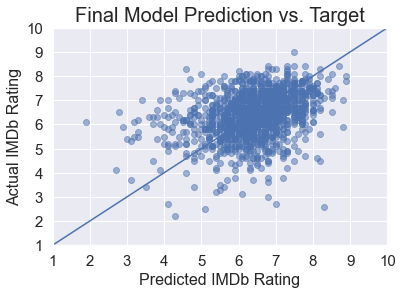

R^{2} score: -0.33


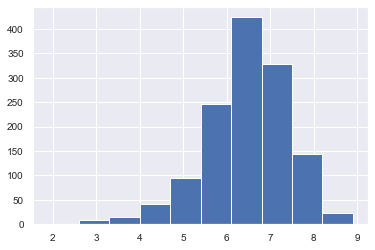

8.9


In [240]:
regr=tree.DecisionTreeRegressor()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
my_plot(regr, x_test, y_test)

In [217]:
X = shuffle(train) #,random_state=0
x_train, x_test, y_train, y_test, movie_title_train, movie_title_test = train_test_split(features, target, movie_title_temp, test_size=0.25)

## some features have very different ranges e.g. absecences, age ect. 
## therefore it is important to standardize the feature set. 

x_mean = x_train.iloc[:,0:4].mean()
x_std = x_train.iloc[:,0:4].std()

x_train.iloc[:,0:4] = (x_train.iloc[:,0:4] - x_mean) / x_std
x_test.iloc[:,0:4] = (x_test.iloc[:,0:4] - x_mean) / x_std

regr=lm.LinearRegression(fit_intercept=False)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

In [218]:
out = [x for x in y_pred if x >10]
len([x for x in y_pred if x >10]), out

(1, [10.477949084312952])

In [219]:
movie_title_test.reset_index(drop=True, inplace=True)
for i in out:
    index_out = list(y_pred).index(i)
    print(movie_title_test[index_out])

Avatar_2009


In [104]:
# Function to return simple model metrics
def get_model_metrics(X_train, y_train, X_test, y_test, model, parametric=True):
    """This function takes the train-test splits as arguments, as well as the algorithm 
    being used, and returns the training score, the test score (both RMSE), the 
    cross-validated scores and the mean cross-validated score. It also returns the appropriate 
    feature importances depending on whether the optional argument 'parametric' is equal to 
    True or False."""
    
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    print(train_pred)
    test_pred = model.predict(X_test)
    print(test_pred)
    
    print('Training score', '{0:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train, train_pred))))
    print('Testing RMSE:', '{0:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, test_pred))))
    cv_scores = -ms.cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print('Cross-validated RMSEs:', np.sqrt(cv_scores))
    print('Mean cross-validated RMSE:', '{0:0.2f}'.format(np.sqrt(np.mean(cv_scores))))
    
    plt.scatter(test_pred, y_test, alpha=.5)
    plt.plot(np.linspace(0,20), np.linspace(0,20))
    plt.title('Final Model Prediction vs. Target',fontdict = {'fontsize' : 20})
    plt.xlabel('Predicted IMDb Rating',fontdict = {'fontsize' : 16})
    plt.ylabel('Actual IMDb Rating',fontdict = {'fontsize' : 16})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.axis([1,10,1,10])
    plt.show()
    
    if parametric == True:
        print(pd.DataFrame(list(zip(X_train.columns, model.coef_, abs(model.coef_))), 
                 columns=['Feature', 'Coef', 'Abs Coef']).sort_values('Abs Coef', ascending=False).head(10))
    else:
        print(pd.DataFrame(list(zip(X_train.columns, model.feature_importances_)), 
                 columns=['Feature', 'Importance']).sort_values('Importance', ascending=False).head(10))
    
    return model

Training score 0.75
Testing RMSE: 12751402802.94
Cross-validated RMSEs: [1.07095426e+10 1.54333218e+09 6.05634808e+09 1.12809042e+09
 1.08522220e+10]
Mean cross-validated RMSE: 7386458395.49


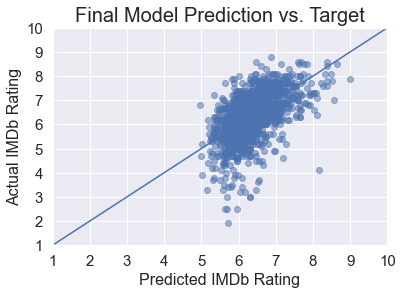

                     Feature          Coef      Abs Coef
1                      gross  7.072994e+12  7.072994e+12
3                     Profit -5.980275e+12  5.980275e+12
0                     budget -1.583776e+12  1.583776e+12
157  continent_North America -3.259684e+11  3.259684e+11
170                 rating_X  3.203662e+11  3.203662e+11
165         rating_Not Rated  3.203662e+11  3.203662e+11
168                 rating_R  3.203662e+11  3.203662e+11
164             rating_NC-17  3.203662e+11  3.203662e+11
163                 rating_G  3.203662e+11  3.203662e+11
167             rating_PG-13  3.203662e+11  3.203662e+11


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
lm_simple = get_model_metrics(x_train, y_train, x_test, y_test, lm.LinearRegression())
lm_simple

#### Regularised - Ridge

In [85]:
# Function to return regularised model metrics
def regularised_model_metrics(X_train, y_train, X_test, y_test, model, grid_params, parametric=True):
    """This function takes the train-test splits as arguments, as well as the algorithm being 
    used and the parameters, and returns the best cross-validated training score, the test 
    score, the best performing model and it's parameters, and the feature importances."""
    
    gridsearch = GridSearchCV(model,
                              grid_params,
                              n_jobs=-1, cv=5, verbose=1, error_score='neg_mean_squared_error')
    
    gridsearch.fit(X_train, y_train)
    print('Best parameters:', gridsearch.best_params_)
    print('Cross-validated score on test data:', '{0:0.2f}'.format(abs(gridsearch.best_score_)))
    best_model = gridsearch.best_estimator_
    print('Testing RMSE:', '{0:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, best_model.predict(X_test)))))
    
    if parametric == True:
        print(pd.DataFrame(list(zip(X_train.columns, best_model.coef_, abs(best_model.coef_))), 
                 columns=['Feature', 'Coef', 'Abs Coef']).sort_values('Abs Coef', ascending=False).head(10))
    else:
        print(pd.DataFrame(list(zip(X_train.columns, best_model.feature_importances_)), 
                 columns=['Feature', 'Importance']).sort_values('Importance', ascending=False).head(10))
    
    return best_model

In [86]:
ridge_params = {'alpha': np.logspace(-10, 10, 10),
               'fit_intercept': [True, False],
               'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

ridge_model = regularised_model_metrics(x_train, y_train, x_test, y_test, lm.Ridge(), ridge_params)

Fitting 5 folds for each of 140 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 669 out of 700 | elapsed:   22.2s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:   22.3s finished


Best parameters: {'alpha': 12.915496650148826, 'fit_intercept': True, 'solver': 'auto'}
Cross-validated score on test data: 0.33
Testing RMSE: 0.80
                              Feature      Coef  Abs Coef
185                   genre_Animation  0.594089  0.594089
192                      genre_Horror -0.431086  0.431086
63                 writer_Woody Allen  0.416723  0.416723
33               director_Woody Allen  0.383693  0.383693
133  company_Fox Searchlight Pictures  0.377498  0.377498
22                director_Rob Reiner  0.355145  0.355145
2                             runtime  0.345794  0.345794
29                director_Tim Burton  0.345180  0.345180
186                   genre_Biography  0.343443  0.343443
55           writer_Quentin Tarantino  0.337028  0.337028


#### Regularised - Lasso

In [87]:
lasso_params = {'alpha': np.logspace(-10, 10, 10),
               'fit_intercept': [True, False]}

lasso_model = regularised_model_metrics(x_train, y_train, x_test, y_test, lm.Lasso(), lasso_params)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.4s finished


Best parameters: {'alpha': 0.0004641588833612782, 'fit_intercept': True}
Cross-validated score on test data: 0.33
Testing RMSE: 0.81
                              Feature      Coef  Abs Coef
63                 writer_Woody Allen  0.963022  0.963022
185                   genre_Animation  0.736092  0.736092
56           writer_Richard Linklater  0.649230  0.649230
106                      country_Iran  0.646384  0.646384
22                director_Rob Reiner  0.636429  0.636429
55           writer_Quentin Tarantino  0.629680  0.629680
29                director_Tim Burton  0.538349  0.538349
100            country_Czech Republic -0.462909  0.462909
133  company_Fox Searchlight Pictures  0.457779  0.457779
25                 director_Sam Raimi  0.456828  0.456828


#### Simple decision tree

[6.5 6.6 5.5 ... 7.7 7.  6.8]
[5.7 7.5 6.3 ... 6.3 5.6 6.1]
Training score 0.00
Testing RMSE: 1.06
Cross-validated RMSEs: [1.09352824 1.07219893 1.06767253 1.06403764 1.00336541]
Mean cross-validated RMSE: 1.06


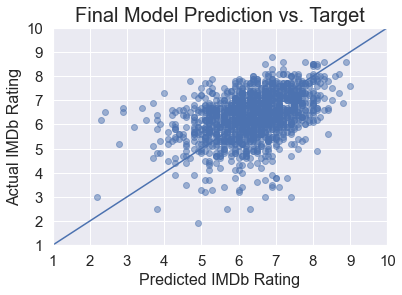

             Feature  Importance
2            runtime    0.249724
3             Profit    0.170130
0             budget    0.103972
1              gross    0.084302
185  genre_Animation    0.024296
168         rating_R    0.017724
186  genre_Biography    0.014652
183     genre_Action    0.014211
167     rating_PG-13    0.010353
187     genre_Comedy    0.009968


In [105]:
dt = get_model_metrics(x_train, y_train, x_test, y_test, tree.DecisionTreeRegressor(), 
                       parametric=False)

---
<a id='explore'></a>
## Part 4: _<u>Exploratory component</u>_

<a id='q1'></a>
### 4.1: _<u>How did major economic crisis affect the production and financial revenue of US movies during 1980 to 2020 ?</u>_

In this section we would like to investigate whether major world economic crisis have had impact on the success of US movies with focus on particularly two factors: **volume of production** and **profit**. We have selected a list of timestamps of interest that could have played role in the progression of US movie industry: 

* **1980-1982**: Early 1980s recession. High unemployement rate and inflation.
* **1990-1991**: Early 1990s recession. 
* **2000-2002**: Early 2000s recession. 
* **2007-2009**: Late 2000s recession, including the infamous 2008 world economic crisis.
* **2020**: Covid-19 pandemic.

In [6]:
df, df_movies = preprocess('Comprehensive IMDb Data.csv')

C:\Users\hanlu\anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice


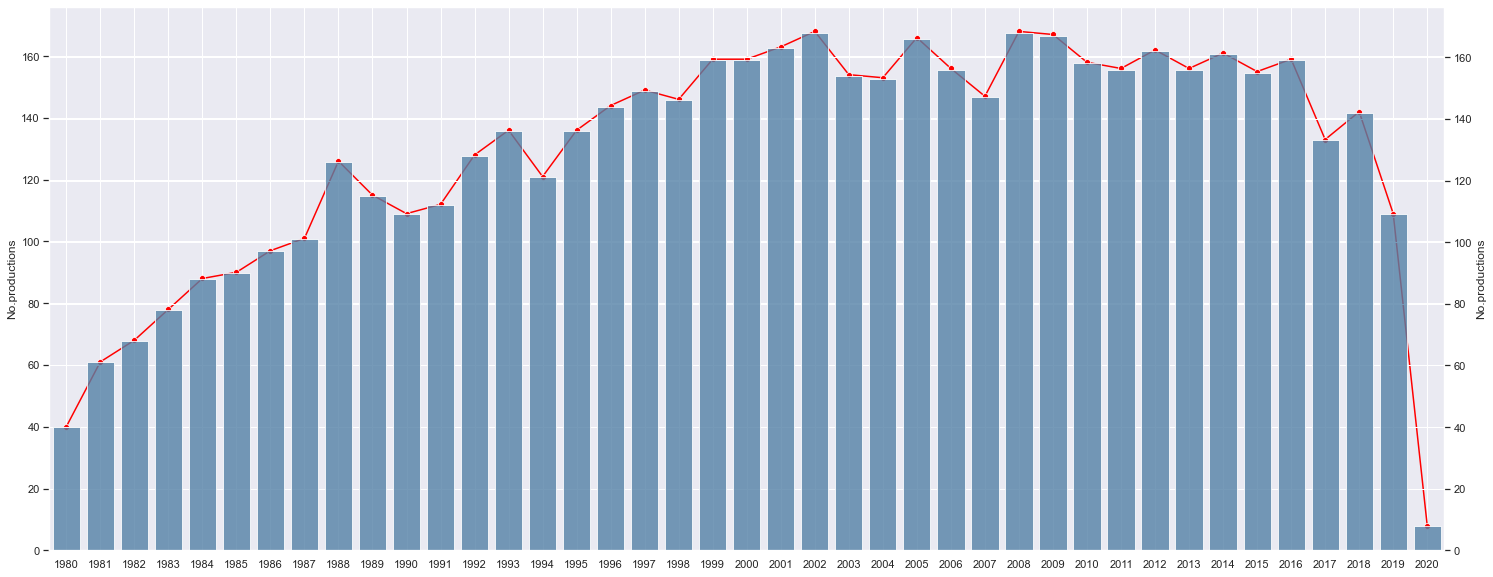

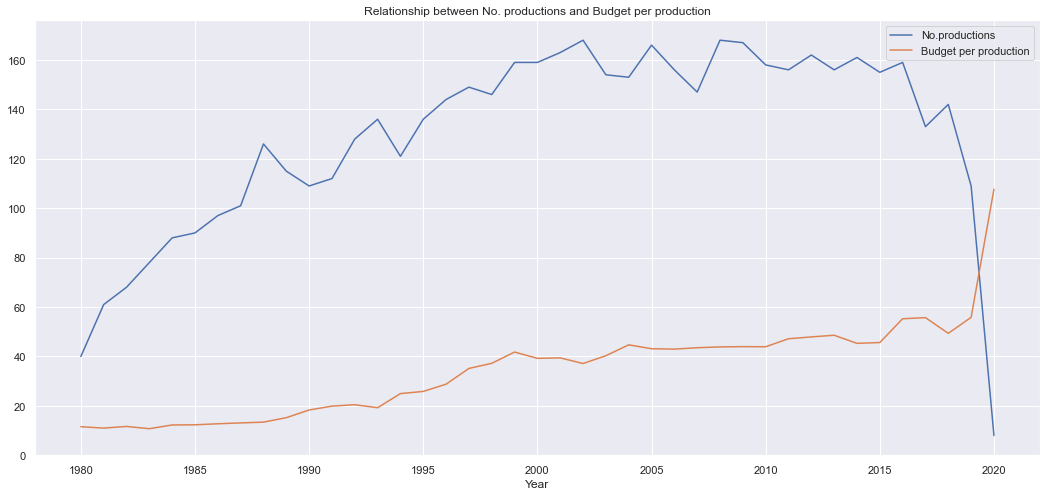

In [354]:
productions(df_movies)

From the first plot above it is not surprising that we see the clear dive in the number of movies produced in 2020, even less than 1980, though it is to note that the data we have only continues until september 2020. This is very much likely caused by the extensive restriction including nationwide lock downs that basically halted physical contacts between people, especially at movie production sites and theatres where lots of people tend to gather. It is even more apparent in the plot showing budget per production where 2020 is the only year that budget spent per production shot up, but much fewer movies were actually produced compared to the previous years. This correpsonds well to the fact that movie production during a pandemic becomes significanly more costly largely due to the intense and meticulous safety measures that need to be conducted on site. (source: https://variety.com/2020/film/news/film-sets-hollywood-pandemic-1234826994/)

And the line plot gets relatively flat around 1990 to 1991, 1999 to 2000 and a sharp downturn from 2005 to 2007. Interestingly, from 1980 to 1982 and 2007 to 2009, supposedly the two of the most severe recession period US experienced, we see increases in movie productions. 


It is however unclear with the simple illustration of volume of production over the years to see the impact of the other timestamps of interest. It could very well be that more movies were produced with lower budget to combat the high unemployement rate, or it could be that ticket prices dropped and more people turned to entertainment as a form of emotional outlet etc. Therefore we will dive deeper into the box office success, hence movie profits during those times. It is to note that value of currency does not stay constant over time, thus the profit, gross and budget values are adjusted for inflation rates using additional data of the US CPI (Customer Product Index) for the period 1980-2020.

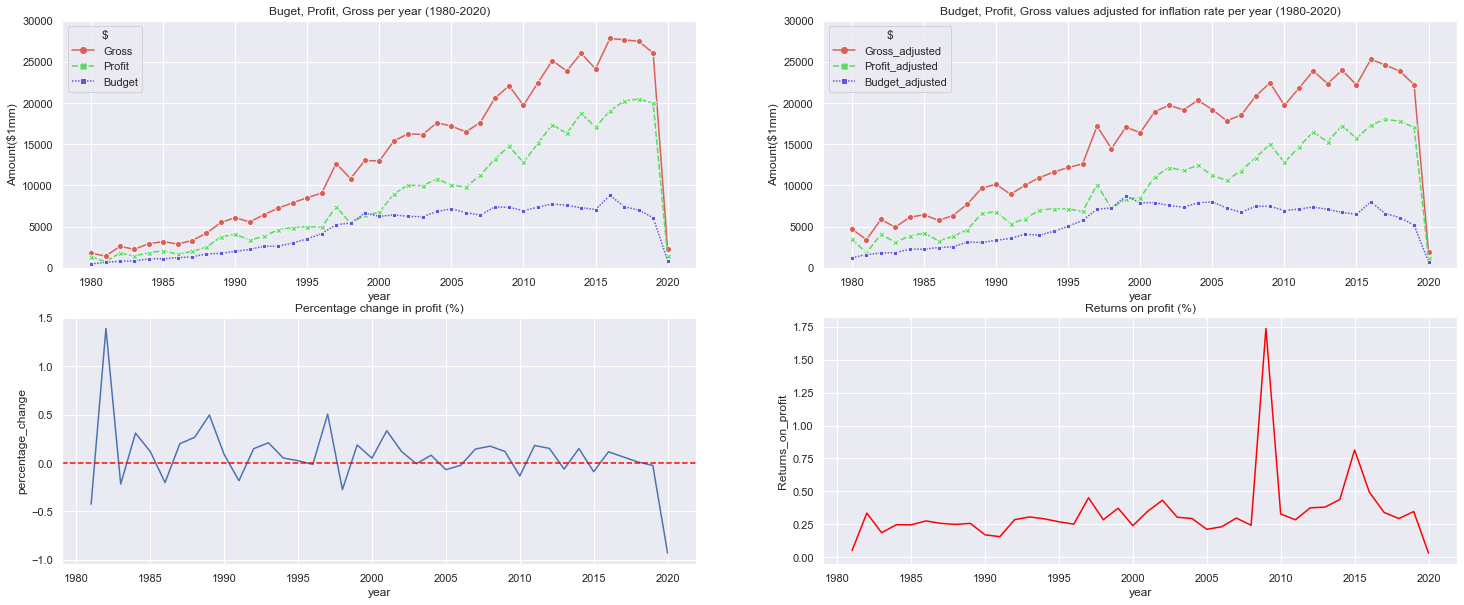

In [258]:
success_visualise(df_movies,'cpi.csv','cpi2.csv')

From the top right plot we can see dips in profit at year 1981, 1991, 2000 and very drastically at year 2020, which corresponds well to the phases of recessions. This is also reflected in the percentage change in profit plot at bottomleft, where the values are negative or close to zero for these years. And we can also see from the bottom right that nearing the end of or 1 to 2 years immediately after the recession periods there tend to be a sharp in crease in return on profits. The time period 2007 to 2009 is especially intrigueing as it didn't follow similar pattern of other recessison periods. We can observe that the profit increased from 2007 to 2009, the percentage change in profit stayed positive during the period, and the return of profits shot up from 2008 to 2009 to all time high between 1980 to 2020. Hence we will further investigate into that period.

,title_year,profit,genre,contribution to profit of the year (%)
3792,Avatar_2009,2610.246203,Action,17.685975
3541,The Dark Knight_2008,820.973645,Action,6.226220
3715,Ice Age: Dawn of the Dinosaurs_2009,796.686817,Animation,5.398028
3382,Harry Potter and the Order of the Phoenix_2007,792.172396,Action,7.056827
3722,Harry Potter and the Half-Blood Prince_2009,684.454096,Action,4.637585
3777,The Twilight Saga: New Moon_2009,661.025481,Adventure,4.478842
3364,Shrek the Third_2007,653.367380,Animation,5.820325
3361,Spider-Man 3_2007,636.983373,Action,5.674373
3711,Transformers: Revenge of the Fallen_2009,636.303693,Action,4.311337
3523,Indiana Jones and the Kingdom of the Crystal Skull_2008,605.653942,Action,4.593247


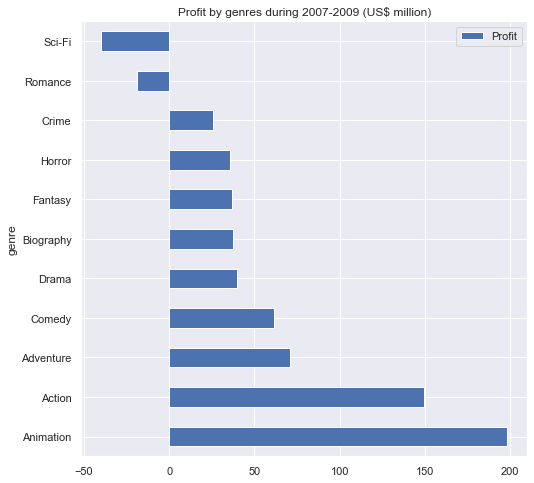

In [305]:
profit_spike(df_movies)

Looking at which movies are released during 2009 we see that Avatar alone contributed to about 18% of the profit that year and it is the movie that brought the greatest amount of profit over the whole period of 1980 to 2020. This could an important factor that led the observation of spike in return on profit at 2009. Cross referencing with news from the period of great recession, we find that US movie industry surged with box office success compared to the previous two decades. Explanations of the phenomenom included that people were going to movie theatres as a form of escapism from the harsh reality. And the fact that they needed content that "don't make you think too much" perfectly coincides with the illustration that shows Animation and Action movies contributed significantly more than any other genres to the movie profits during the period. 

source: https://www.nytimes.com/2009/03/01/movies/01films.html

---
<a id='conc'></a>
## Part 5: _<u>Conclusion</u>_

# Appendix

## Preprocess function

In [1]:
def preprocess(path):
    df = pd.read_csv(path)

    ## create unique identifier of each movie 
    df['title_year'] = df['title'] + '_' + df['year'].astype(str)
    ## create profit column
    df['Profit'] = df['gross'] - df['budget']

    #########################################################################################
    ## create new compact datarfame
    ## extract list of unique movie titles 
    #titles=list(set(df['title']))
    title_year_set = list(set(df['title_year']))

    # Create a dataframe where each row is a unique movie 
    movies={}
    for t in title_year_set:
        # Create a temperary datframe for subset of with title_year = t
        df_temp = df[df.title_year == t]

        # Extracting all the unique values for the attributes for the given title_year t
        star = np.unique(df_temp['star'])
        writer = np.unique(df_temp['writer'])
        director = np.unique(df_temp['director'])
        title = np.unique(df_temp['title'])
        rating = np.unique(df_temp['rating'])
        genre =np.unique(df_temp['genre'])
        released = np.unique(df_temp['released'])
        year = np.unique(df_temp['year'])
        month = np.unique(df_temp['month'])
        day = np.unique(df_temp['day'])
        score = np.unique(df_temp['score'])
        country = np.unique(df_temp['country'])
        budget = np.unique(df_temp['budget'])
        gross = np.unique(df_temp['gross'])
        company = np.unique(df_temp['company'])
        runtime = np.unique(df_temp['runtime'])
        region = np.unique(df_temp['region'])
        titleId = np.unique(df_temp['titleId'])
        primaryName = np.unique(df_temp['primaryName'])

        # Extract attributes which are based on primaryName and then as dictionaries
        cat = {}
        ncon = {}
        prim = {}
        known = {}
        for index, row in df[df.title_year == t].iterrows():
            pN = row['primaryName']
            cat[pN] = row['category']
            ncon[pN] = row['nconst']
            known[pN] = row['knownForTitles']

        movie = {'titleId': titleId, 'title':title, 'rating':rating, 'region':region, 'genre': genre, 'released': released, 'year':year,
        'month':month, 'day':day, 'score':score, 'director':director, 'writer':writer, 'star':star, 'country':country,
        'budget':budget, 'gross':gross, 'company':company, 'runtime': runtime, 'primaryName':primaryName, 'category':cat, 'nconst':ncon, 'knownForTitles':known}
        movies[t]=movie
    
    # Construct dataframe 
    d=pd.DataFrame(movies)
    df2=d.transpose()

    df_movies = df2.copy()
    # Finding one value for budget for each title_year
    df_movies['budget'] = df_movies['budget'].apply(lambda x: x if len(x) == 1 else [np.nanmean(x)])

    # Unpack array
    col_unpack = ['title', 'rating', 'region', 'genre', 'released', 'year', 'month',
        'day', 'score', 'director', 'writer', 'star', 'country', 'budget',
        'gross', 'company', 'runtime']
        
    for col in col_unpack:
        df_movies[col] = [i[0] for i in df_movies[col]]

    #############################################################################
    ## Data cleaning

    # Drop missing values in budget
    df_movies = df_movies.dropna(subset=['budget'])
    # Dealing with missing values in rating
    df_movies['rating'].fillna("Not Rated", inplace = True) 
    df_movies['rating'] = df_movies['rating'].replace(['Unrated'],'Not Rated')
    df_movies.fillna({'country':df_movies.country.mode().astype(str)[0],
    'company':df_movies.company.mode().astype(str)[0],'runtime':df_movies.runtime.median()},inplace=True)

    df_movies = df_movies.dropna(subset=['month'])

    df_movies['released'] = pd.to_datetime(df_movies['released'],format='%Y-%m-%d')
    df_movies = df_movies.sort_values(by= ['released'])

    # Chagne type of month
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    df_movies['month'] = pd.Categorical(df_movies['month'], categories=months, ordered=True)

    # Convert the gross and budget from $ to Million $ 
    df_movies['gross'] = df_movies['gross']/1000000
    df_movies['budget'] = df_movies['budget']/1000000

    df_movies = df_movies.reset_index().rename(columns = {'index':'title_year'})

    ####################################################################################
    ## add new features to df_movies

    df_movies['Profit'] = df_movies['gross'] - df_movies['budget']

    ## we will create new column called released_2 that only consists of year and month information of movie release
    df_movies['released_2'] = df_movies['year'].astype(str) + '_' + df_movies['month'].astype(str)

    df_movies['country'] = df_movies['country'].replace(['West Germany'],'Germany')
    df_movies['country'] = df_movies['country'].replace(['Yugoslavia'],'Serbia')
    df_movies['country'] = df_movies['country'].replace(['Federal Republic of Yugoslavia'],'Serbia')

    df_movies['continent'] = df_movies['country'].apply(country_to_continent)

    # Create duration column
    df_movies['duration'] = df_movies['runtime'].apply(duration)

    return df,df_movies


In [2]:
from collections import Counter

# Define function for binarization of columns with the top N most commen ones
def binary_features(train, features, N):
    for feature in features:
# Extract information and convert to list 
        if feature == 'primaryName':
            train[feature]= train[feature].apply(lambda x:[g for g in x])
        else:   
            train[feature]= train[feature].apply(lambda x:[x or []])

        # Finding top 30 most commen
        c = Counter(sum(train[feature], []))
        N_new = len(c)
        most_N = [x[0] for x in c.most_common(N)]

        # Removing the ones that are not in the top 30
        train['temp_N'] = train[feature].apply(lambda x: list(set(most_N) & set(x)))

        # Creat dummies
        dummies = pd.get_dummies(train['temp_N'].apply(pd.Series).stack(), prefix = feature).groupby(level=0).sum()
  
        # Join back with the original dataframe
        train = train.join(dummies)
        train.iloc[:,-N_new:] = train.iloc[:,-N_new:].fillna(0)

        # Drop the temperary colum
        train.drop(columns=['temp_N'], inplace=True)

        train.drop(columns=[feature], inplace=True)
    return train

## Helper functions

In [4]:
import pycountry_convert as pc

def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

def duration(x):
    if x <= 120:
        return 'Short'
    else:
        return 'Long'
    

## Q1 functions

In [353]:
def productions(df_movies):
    temp = df_movies.groupby(['year']).count().rename(columns = {'duration':'No.productions'}).reset_index()
    fig, ax1 = plt.subplots(figsize=(25,10))
    sns.lineplot(data = temp['No.productions'], marker='o', color = '#FF0000',sort = False, ax=ax1)
    ax2 = ax1.twinx()
    sns.barplot(data = temp, x='year', y='No.productions', alpha=0.8, color = '#4682B4', ax=ax2)
    plt.show()
    temp2 = df_movies.groupby(['year']).sum().reset_index()
    budget_production_ratio = temp2.budget/temp.runtime
    d = {'year': temp.year, 'No.productions': temp.title,'Budget':temp2.budget, 'Budget_per_production': budget_production_ratio}
    df_new = pd.DataFrame(d)

    plt.plot(df_new['year'], df_new['No.productions'], label = "No.productions")
    plt.plot(df_new['year'], df_new['Budget_per_production'], label = "Budget per production")
    plt.xlabel('Year')
    plt.ylabel('')
    plt.title('Relationship between No. productions and Budget per production')
    plt.legend()
    plt.show()

In [261]:
def success_visualise(df_movies,inflation,cpi):

    profit = df_movies.loc[:,['year','Profit']].rename(columns = {'Profit':'value'}).groupby(['year']).sum().reset_index().join(pd.DataFrame({'$':['Profit']*41}))
    gross = df_movies.loc[:,['year','gross']].rename(columns = {'gross':'value'}).groupby(['year']).sum().reset_index().join(pd.DataFrame({'$':['Gross']*41}))
    budget = df_movies.loc[:,['year','budget']].rename(columns = {'budget':'value'}).groupby(['year']).sum().reset_index().join(pd.DataFrame({'$':['Budget']*41}))
    temp2 = pd.concat([gross,profit,budget]).reset_index()

    ## get inflation rate from Comsumer Product Index data for US
    df_cpi = pd.read_csv(inflation,skiprows=3)
    inflation_rate = df_cpi[df_cpi['Country Name'] == 'United States'].T.iloc[24:,].reset_index().rename(columns = {251:'Inflation','index':'year'})
    df_cpi_2= pd.read_csv(cpi,skiprows=3)
    ## cpi base year 2010
    cpi = df_cpi_2[df_cpi_2['Country Name'] == 'United States'].T.iloc[24:,].reset_index().rename(columns = {251:'CPI','index':'year'})
    inf_cpi = inflation_rate.merge(cpi,on='year')

    profit2 = profit.groupby(['year']).sum().reset_index()
    profit2['percentage_change'] = profit2.value.pct_change()
    ## adjust profit for inflation rate using 2010 as base year 
    profit2['profit_adjusted'] = (profit2.value/inf_cpi.CPI.iloc[:-1,])*100
    ## caculate returns in profits / earnings 
    profit2['Returns_on_profit'] = (1+profit2['percentage_change'].iloc[1:,])/(1+inflation_rate.iloc[1:-1,].Inflation)

    ## adjust gross values for inflation rate using 2010 as base year
    gross2 = gross.groupby(['year']).sum().reset_index()
    gross2['gross_adjusted'] = (gross2.value/inf_cpi.CPI.iloc[:-1,])*100

    ## Adjust for budget values for inflation rate using 2010 as base year 
    budget2 = budget.groupby(['year']).sum().reset_index()
    budget2['budget_adjusted'] = (budget2.value/inf_cpi.CPI.iloc[:-1,])*100

    P = profit2.join(pd.DataFrame({'$':['Profit_adjusted']*len(profit2)})).rename(columns = {'profit_adjusted':'Amount($1mm)'})
    G = gross2.join(pd.DataFrame({'$':['Gross_adjusted']*len(gross2)})).rename(columns = {'gross_adjusted':'Amount($1mm)'})
    B = budget2.join(pd.DataFrame({'$':['Budget_adjusted']*len(budget2)})).rename(columns = {'budget_adjusted':'Amount($1mm)'})

    temp3 = pd.concat([G,P,B]).reset_index()
    temp3[['Amount($1mm)','Returns_in_profit']] = temp3[['Amount($1mm)','Returns_on_profit']].apply(pd.to_numeric, errors='coerce', axis=1)

    temp2 = temp2.rename(columns={'value':'Amount($1mm)'})

    fig, ax =plt.subplots(2,2,figsize=(25,10))

    palette = sns.color_palette("hls", 3)

    ax[0,0].set(ylim=(0, 30000))
    sns.lineplot(
        data=temp2,
        x="year", y='Amount($1mm)', hue="$", style = '$',
        markers = True, palette=palette,ax=ax[0,0]
    ).set_title('Buget, Profit, Gross per year (1980-2020)')
    ax[0,1].set(ylim=(0, 30000))
    sns.lineplot(
        data=temp3,
        x="year", y='Amount($1mm)', hue="$", style = '$',
        markers = True, palette=palette,ax=ax[0,1]
    ).set_title('Budget, Profit, Gross values adjusted for inflation rate per year (1980-2020)')


    sns.lineplot(
        data=profit2,
        x="year", y='percentage_change',
        markers = True, palette=palette,ax = ax[1,0]
    ).set_title('Percentage change in profit (%)')
    ax[1,0].axhline(0, ls='--',color = 'red')

    sns.lineplot(
        data=profit2,
        x="year", y='Returns_on_profit',
        markers = True, color = 'red',ax = ax[1,1]
    ).set_title('Returns on profit (%)')

    # profit = df_movies.loc[:,['year','Profit']].rename(columns = {'Profit':'value'}).join(pd.DataFrame({'type':['Profit']*len(df_movies)}))
    # gross = df_movies.loc[:,['year','gross']].rename(columns = {'gross':'value'}).join(pd.DataFrame({'type':['Gross']*len(df_movies)}))
    # budget = df_movies.loc[:,['year','budget']].rename(columns = {'budget':'value'}).join(pd.DataFrame({'type':['Budget']*len(df_movies)}))
    # temp2 = pd.concat([gross,profit,budget]).reset_index()
    # palette = sns.color_palette("hls", 3)
    # sns.lineplot(
    #     data=temp2,
    #     x="year", y="value", hue="type", style = 'type',
    #     markers = True, palette=palette
    # )

In [304]:
from IPython.display import display, HTML
def profit_spike(df_movies):
    movie_2007_2009 = df_movies[df_movies['year'].isin([2007,2008,2009])]
    movie_2007_2009.loc[movie_2007_2009['year'] == 2007,'Percent_contribute_profit'] = (movie_2007_2009[movie_2007_2009['year'] == 2007].Profit/sum(movie_2007_2009[movie_2007_2009['year'] == 2007].Profit))*100
    movie_2007_2009.loc[movie_2007_2009['year'] == 2008,'Percent_contribute_profit'] = (movie_2007_2009[movie_2007_2009['year'] == 2008].Profit/sum(movie_2007_2009[movie_2007_2009['year'] == 2008].Profit))*100
    movie_2007_2009.loc[movie_2007_2009['year'] == 2009,'Percent_contribute_profit'] = (movie_2007_2009[movie_2007_2009['year'] == 2009].Profit/sum(movie_2007_2009[movie_2007_2009['year'] == 2009].Profit))*100
    display(HTML(movie_2007_2009[['title_year','Profit','genre','Percent_contribute_profit']].sort_values(by = 'Profit', ascending  = False).head(10).rename(columns = {
        'Profit':'profit','Percent_contribute_profit':'contribution to profit of the year (%)'
    }).to_html()))

    df31 = movie_2007_2009[['title', 'Profit','genre']]
    df41 = movie_2007_2009.groupby(['genre']).mean()
    df41.sort_values('Profit', ascending=False, inplace = True )
    df41[['Profit']].plot.barh(stacked=True, title = 'Profit by genres during 2007-2009 (US$ million)', figsize=(8, 8))
    plt.show()